In [47]:
import math
from qiskit import qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector
from qiskit.circuit.library import QFT
%matplotlib inline

https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html#example2

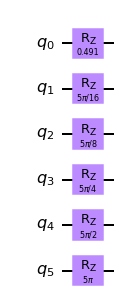

In [70]:
# number to convert from DEC base to Fourier base
number_dec = 5

qc = QuantumCircuit(6, name='qc_fourier_base')
qc.rz(number_dec*math.pi/32,0)
qc.rz(number_dec*math.pi/16,1)
qc.rz(number_dec*math.pi/8,2)
qc.rz(number_dec*math.pi/4,3)
qc.rz(number_dec*math.pi/2,4)
qc.rz(number_dec*math.pi,5)

qc_five = qc.to_gate()
control_gate_five = qc_five.control()

qc.draw(output="mpl")

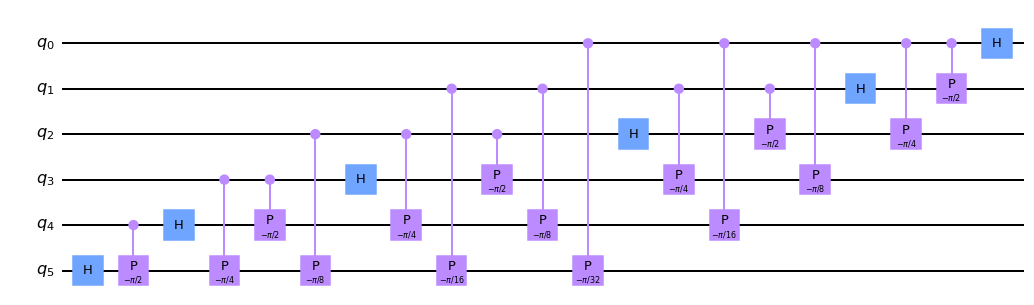

In [71]:
qft_gate_inv = QFT(num_qubits=6, approximation_degree=0, do_swaps=False, inverse=True, insert_barriers=False, name='qft_gate_inv')
qft_gate_six_inverse = qft_gate_inv.to_gate()

qft_gate_inv.draw(output="mpl")

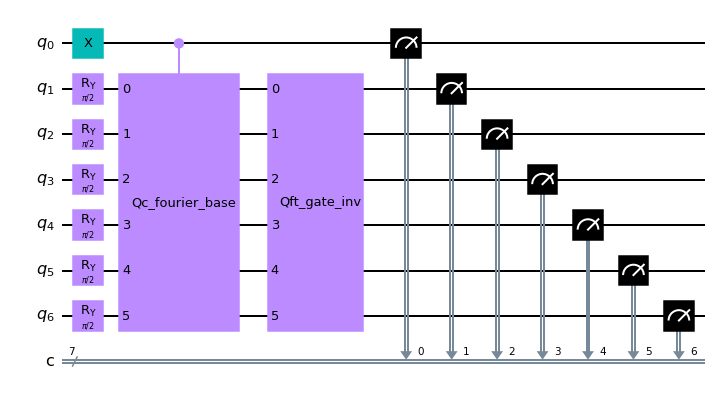

In [72]:
qc_final = QuantumCircuit(7,7, name="gate_mul_y")

qc_final.x(0)
qc_final.ry(math.pi/2,range(1,7))
qc_final.append(control_gate_five, [0,1,2,3,4,5,6])
qc_final.append(qft_gate_six_inverse, [1,2,3,4,5,6])

qc_final.measure(range(7), range(7))


qc_final.draw(output="mpl")

In [73]:
# simulators
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")
qasm_sim = qiskit.Aer.get_backend("qasm_simulator")

In [74]:
sim_state_vector = qiskit.execute(qc_final, backend=statevec_sim).result().get_statevector()
sim_counts = qiskit.execute(qc_final, backend=qasm_sim, shots=1024).result().get_counts()

{'1010001': 1024}


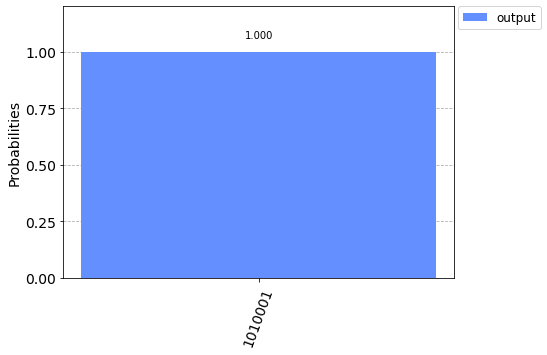

In [75]:
print(sim_counts)
plot_histogram([sim_counts], legend=['output'])